In [408]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Preparazione dei dati

In [409]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')

In [410]:
total_inicial, _ = sinasc_raw.shape
total_inicial

27028

In [411]:
Sinasc = sinasc_raw[['IDADEMAE', 'ESCMAE', 'QTDFILVIVO', 'QTDFILMORT', 
                         'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC',
                         'HORANASC', 'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'DTCADASTRO',
                         'DTNASCMAE', 'RACACORMAE', 'IDADEPAI', 'QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES',
                         'munResStatus', 'munResTipo', 'munResNome', 'munResUf']]

Sinasc2 = Sinasc[Sinasc['IDADEMAE'] >= 22]
Sinasc = Sinasc[Sinasc['IDADEMAE'] <= 18]

In [412]:
def smista(eta):
    if (eta >= 13) & (eta <= 14):
        return 'De 13 à 14'
    elif (eta >= 15) & (eta <= 16):
        return 'De 15 à 16'
    else:
        return 'De 17 à 18'

Sinasc['Status'] = Sinasc['IDADEMAE'].apply(smista)

In [413]:
Sinasc.head()

,IDADEMAE,ESCMAE,QTDFILVIVO,QTDFILMORT,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,...,RACACORMAE,IDADEPAI,QTDGESTANT,QTDPARTNOR,QTDPARTCES,munResStatus,munResTipo,munResNome,munResUf,Status
13,18,1 a 3 anos,0.0,0.0,37 a 41 semanas,Única,Vaginal,3,2019-03-28,1515.0,...,4.0,20.0,0.0,0.0,0.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,De 17 à 18
33,18,4 a 7 anos,0.0,2.0,37 a 41 semanas,Única,Vaginal,4,2019-04-10,1100.0,...,1.0,22.0,2.0,0.0,0.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,De 17 à 18
36,18,4 a 7 anos,1.0,0.0,37 a 41 semanas,Única,Cesáreo,2,2019-04-23,1512.0,...,NaN,23.0,1.0,0.0,1.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,De 17 à 18
37,18,8 a 11 anos,0.0,0.0,37 a 41 semanas,Única,Vaginal,4,2019-04-24,2010.0,...,5.0,20.0,0.0,0.0,0.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,De 17 à 18
44,14,4 a 7 anos,0.0,0.0,37 a 41 semanas,Única,Cesáreo,4,2019-05-28,1545.0,...,4.0,35.0,0.0,0.0,0.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,De 13 à 14


In [414]:
Sinasc2.head()

,IDADEMAE,ESCMAE,QTDFILVIVO,QTDFILMORT,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,...,DTNASCMAE,RACACORMAE,IDADEPAI,QTDGESTANT,QTDPARTNOR,QTDPARTCES,munResStatus,munResTipo,munResNome,munResUf
1,29,8 a 11 anos,1.0,0.0,37 a 41 semanas,Única,Cesáreo,4,2019-02-21,1830.0,...,27041989.0,1.0,24.0,1.0,0.0,1.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,37,8 a 11 anos,2.0,0.0,37 a 41 semanas,Única,Cesáreo,4,2019-02-25,915.0,...,6031981.0,1.0,32.0,2.0,1.0,1.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,30,12 anos ou mais,0.0,0.0,37 a 41 semanas,Única,Cesáreo,3,2019-03-20,835.0,...,15071988.0,4.0,24.0,0.0,0.0,0.0,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,30,8 a 11 anos,1.0,0.0,37 a 41 semanas,Única,Cesáreo,4,2019-03-23,750.0,...,12111988.0,4.0,27.0,1.0,0.0,1.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
5,33,1 a 3 anos,2.0,1.0,37 a 41 semanas,Única,Cesáreo,4,2019-03-27,825.0,...,28121985.0,1.0,40.0,3.0,1.0,1.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia


# Filtro d'età

In [415]:
def filtro(idade, diferenca:None):
    df = Sinasc.dropna()
    minimo = idade[0]
    maximo = idade[-1]

    if minimo == maximo:
        data_frame = Sinasc[(df['IDADEMAE'] >= minimo) & (df['IDADEMAE'] <= maximo)]
        return data_frame
    
    if diferenca != None:
        minimo = diferenca[0]
        maximo = diferenca[-1]
        data_frame = data_frame[(data_frame['DIF'] >= minimo) & (data_frame['DIF'] <= maximo)]
        return data_frame

# Donne che hanno avuto figli prima dei diciott'anni

In [416]:
total2, _ = Sinasc.shape
Sinasc.shape 

(3206, 27)

In [417]:
print(f'{round(((total2 / total_inicial) * 100), 0)}% das mulheres tiveram filho muito jovem.')

12.0% das mulheres tiveram filho muito jovem.


# Differenza uomo donna

In [418]:
idades = Sinasc.dropna() # Per aalizzare la differenza tra l'uomo e la donna
pais, _ = idades.shape
idades.shape

(601, 27)

In [419]:
print(f'E circa {round(((pais / total2) * 100), 0)}% podem ser analizados para os pais.')

E circa 19.0% podem ser analizados para os pais.


In [420]:
idades['DIF'] = idades['IDADEPAI'] - idades['IDADEMAE']
#idades = idades[idades['IDADEPAI'] >= 30]
idades.agg({'IDADEMAE':['min','max', 'mean'], 'IDADEPAI':['min','max', 'mean'], 'DIF':['min','max', 'mean']})

C:\Users\Soldado\AppData\Local\Temp\ipykernel_2600\2655447640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idades['DIF'] = idades['IDADEPAI'] - idades['IDADEMAE']


,IDADEMAE,IDADEPAI,DIF
min,13.000000,15.000000,-1.000000
max,18.000000,50.000000,32.000000
mean,16.826955,23.019967,6.193012


In [421]:
idades_pai = idades[idades['IDADEPAI'] >= 18]
idades_pai_qtd, _ = idades_pai.shape
print(f'{round(((idades_pai_qtd / pais) * 100), 0)}%')

92.0%


In [422]:
idades.head()

,IDADEMAE,ESCMAE,QTDFILVIVO,QTDFILMORT,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,...,IDADEPAI,QTDGESTANT,QTDPARTNOR,QTDPARTCES,munResStatus,munResTipo,munResNome,munResUf,Status,DIF
13,18,1 a 3 anos,0.0,0.0,37 a 41 semanas,Única,Vaginal,3,2019-03-28,1515.0,...,20.0,0.0,0.0,0.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,De 17 à 18,2.0
33,18,4 a 7 anos,0.0,2.0,37 a 41 semanas,Única,Vaginal,4,2019-04-10,1100.0,...,22.0,2.0,0.0,0.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,De 17 à 18,4.0
37,18,8 a 11 anos,0.0,0.0,37 a 41 semanas,Única,Vaginal,4,2019-04-24,2010.0,...,20.0,0.0,0.0,0.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,De 17 à 18,2.0
44,14,4 a 7 anos,0.0,0.0,37 a 41 semanas,Única,Cesáreo,4,2019-05-28,1545.0,...,35.0,0.0,0.0,0.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,De 13 à 14,21.0
49,17,4 a 7 anos,1.0,0.0,37 a 41 semanas,Única,Vaginal,3,2019-05-02,335.0,...,21.0,1.0,1.0,0.0,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,De 17 à 18,4.0


In [424]:
idades.munResNome.value_counts().head(5)

munResNome
Cacoal             101
Rolim de Moura      78
Ji-Paraná           70
Pimenta Bueno       69
Espigão D'Oeste     32
Name: count, dtype: int64

In [425]:
df = idades[['Status', 'PARTO', 'DIF', 'IDADEPAI', 'QTDGESTANT']]
df.groupby(['Status', 'PARTO']).count()

DIF  IDADEPAI  QTDGESTANT
Status     PARTO                             
De 13 à 14 Cesáreo   18        18          18
           Vaginal    5         5           5
De 15 à 16 Cesáreo  122       122         122
           Vaginal   60        60          60
De 17 à 18 Cesáreo  279       279         279
           Vaginal  117       117         117

In [426]:
idades.columns

Index(['IDADEMAE', 'ESCMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GESTACAO',
       'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC', 'SEXO',
       'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'DTCADASTRO', 'DTNASCMAE',
       'RACACORMAE', 'IDADEPAI', 'QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES',
       'munResStatus', 'munResTipo', 'munResNome', 'munResUf', 'Status',
       'DIF'],
      dtype='object')

In [427]:
df = idades[['Status', 'DIF', 'IDADEPAI', 'PESO', 'CONSULTAS']]
df.groupby(['Status']).mean()

,DIF,IDADEPAI,PESO,CONSULTAS
Status,,,,
De 13 à 14,8.565217,22.478261,3207.739130,3.695652
De 15 à 16,6.873626,22.521978,3105.928571,3.593407
De 17 à 18,5.742424,23.280303,3158.290404,3.669192


c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecat

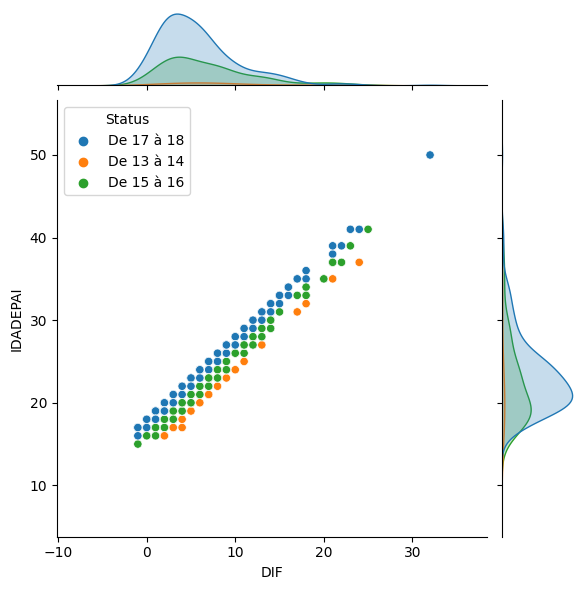

In [428]:
sns.jointplot(data=idades
              , x="DIF"
              , y="IDADEPAI"
              , hue = 'Status')